In [1]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob

Pra começar os testes do nosso modelo multi-label, vou inicialmente coletar uma amostra aleatória do nosso corpus completo.

In [72]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Gerando os chromas "perfeitos" de cada acorde (apenas 0 e 1)

In [70]:
acordes_7 = [note + '7' for note in notes]
acordes_dim = [note + 'dim' for note in notes]
acordes_maj7 = [note + 'maj7' for note in notes]
acordes_meio_dim = [note + 'meio_dim' for note in notes]
acordes_min7 = [note + 'min7' for note in notes]

In [73]:
dict_maj7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 11

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_maj7[i]
    dict_maj7[chord] = acorde_chroma

In [74]:
dict_7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 4
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_7[i]
    dict_7[chord] = acorde_chroma

In [75]:
dict_min7 = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 7
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_min7[i]
    dict_min7[chord] = acorde_chroma

In [76]:
dict_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 9

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_dim[i]
    dict_dim[chord] = acorde_chroma

In [77]:
dict_meio_dim = {}
for i in list(range(12)):
    
    # definindo cada nota do acorde a partir dos intervalos, em semitons
    fundamental = 0 + i
    terca = fundamental + 3
    quinta = fundamental + 6
    setima = fundamental + 10

    # mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
    i_fund = semitons[fundamental]
    i_terca = semitons[terca]
    i_quinta = semitons[quinta]
    i_setima = semitons[setima]


    acorde_list = [i_fund, 
                   i_terca, 
                   i_quinta, 
                   i_setima]

    # definindo o chroma
    acorde_chroma = np.zeros(12)
    acorde_chroma[acorde_list] = 1
    

    chord = acordes_meio_dim[i]
    dict_meio_dim[chord] = acorde_chroma

In [78]:
dict_chords = {**dict_maj7, **dict_7, **dict_min7, **dict_dim, **dict_meio_dim}
dict_chords

{'Cmaj7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 'Dbmaj7': array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 'Dmaj7': array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.]),
 'Ebmaj7': array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.]),
 'Emaj7': array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.]),
 'Fmaj7': array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.]),
 'Gbmaj7': array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.]),
 'Gmaj7': array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.]),
 'Abmaj7': array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.]),
 'Amaj7': array([0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.]),
 'Bbmaj7': array([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
 'Bmaj7': array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.]),
 'C7': array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 'Db7': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 'D7': array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

Definindo o formato dos nossos outputs:

In [93]:
df_chromas_perfeitos = pd.DataFrame(dict_chords).transpose().reset_index()
df_chromas_perfeitos.rename(columns={'index':'true'}, inplace=True)

df_chromas_perfeitos.rename(columns)

,true,0,1,2,3,4,5,6,7,8,9,10,11
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [99]:
for key, note in dict_notes.items():
    
    df_chromas_perfeitos.rename(columns={key:note+'_y'}, inplace=True)
    
df_chromas_perfeitos

,true,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [58]:
corpus_folder = '../corpus/generated_chords/audio'
files = []

dict_notes = dict(zip(list(range(12)), notes))

df_model = pd.DataFrame()

# entrando na pasta de cada chord type 
for chord_type in os.listdir(corpus_folder):
      
    # obtendo o caminho para cada arquivo de audio
    for audio_file in glob.glob(corpus_folder+'/'+chord_type+'/*.wav'):

        # obtendo o nome do arquivo
        file_name = audio_file.split('/')[-1]
        

        # carregando o audio com o librosa
        y, sr = librosa.load(audio_file)


        # calculando o chroma para cada audio
        N = len(y)
        chroma = librosa.feature.chroma_stft(y=y, 
                                                sr=sr, 
                                                tuning=0.0, 
                                                norm=0, 
                                                hop_length=N+1, 
                                                n_fft=N
                                            )

        for i, note in dict_notes.items():
            df_model.at[file_name, note] = chroma[i]
        
#         df_model.at[file_name, 'chroma'] = [chroma.T]
        df_model.at[file_name, 'true'] = audio_file.split('/')[-1].split('_')[0]
#         df_model.at[file_name, 'pred'] = pred
        print(file_name)

Gdim_samba_Piano.wav
Dbdim_ruchenitza_2_Piano.wav
Bbdim_Nawakhat_Piano.wav
Abdim_agogo-samba_Piano.wav
Adim_pictures_at_an_exhibition_Piano.wav
Fdim_bossa-nova_Piano.wav
Abdim_ngbaka-maibo_Piano.wav
Gbdim_Nawakhat_Piano.wav
Ebdim_spanish_tango_Piano.wav
Fdim_venda_Piano.wav
Bbdim_ngbaka-maibo_Piano.wav
Dbdim_ngbaka-maibo_Piano.wav
Adim_aksak_Piano.wav
Abdim_fandango_Piano.wav
Bdim_york-samai_Piano.wav
Bdim_Nawakhat_Piano.wav
Dbdim_venda_Piano.wav
Adim_outside_now_Piano.wav
Cdim_outside_now_Piano.wav
Edim_Nawakhat_Piano.wav
Ebdim_ruchenitza_2_Piano.wav
Adim_ruchenitza_2_Piano.wav
Gdim_spanish_tango_Piano.wav
Gdim_ngbaka-maibo_Piano.wav
Abdim_bendir_Piano.wav
Ebdim_fandango_Piano.wav
Fdim_pictures_at_an_exhibition_Piano.wav
Bdim_aksak_Piano.wav
Dbdim_pictures_at_an_exhibition_Piano.wav
Edim_york-samai_Piano.wav
Cdim_aksak_Piano.wav
Adim_venda_clapping_Piano.wav
Gdim_aka_upper_sangha_Piano.wav
Bbdim_pictures_at_an_exhibition_Piano.wav
Gbdim_samba_Piano.wav
Gdim_pictures_at_an_exhibition_P

F7_outside_now_Piano.wav
E7_venda_clapping_Piano.wav
Ab7_aksak_Piano.wav
G7_samba_Piano.wav
F7_spanish_tango_Piano.wav
B7_samba_Piano.wav
F7_aka_Piano.wav
D7_outside_now_Piano.wav
A7_agsag-samai_Piano.wav
Bb7_aka_upper_sangha_Piano.wav
B7_pictures_at_an_exhibition_Piano.wav
Bb7_ngbaka-maibo_Piano.wav
F7_venda_Piano.wav
F7_york-samai_Piano.wav
D7_venda_Piano.wav
Eb7_outside_now_Piano.wav
F7_venda_clapping_Piano.wav
Gb7_ngbaka-maibo_Piano.wav
Db7_venda_clapping_Piano.wav
Gb7_Nawakhat_Piano.wav
Eb7_mpre_Piano.wav
D7_aksak_Piano.wav
F7_al-saghil-al-sani_Piano.wav
Gb7_venda_clapping_Piano.wav
Bb7_agsag-samai_Piano.wav
D7_ngbaka-maibo_Piano.wav
Bb7_york-samai_Piano.wav
Eb7_pictures_at_an_exhibition_Piano.wav
G7_cinquillo_Piano.wav
D7_al-saghil-al-sani_Piano.wav
C7_samba_Piano.wav
Eb7_ngbaka-maibo_Piano.wav
Eb7_venda_clapping_Piano.wav
Gb7_mpre_Piano.wav
Eb7_Nawakhat_Piano.wav
Ab7_agogo-samba_Piano.wav
D7_fandango_Piano.wav
B7_venda_clapping_Piano.wav
C7_york-samai_Piano.wav
Gb7_fandango_Pian

Gbmin7_outside_now_Piano.wav
Gmin7_york-samai_Piano.wav
Cmin7_aka_Piano.wav
Dbmin7_venda_Piano.wav
Abmin7_spanish_tango_Piano.wav
Gmin7_cinquillo_Piano.wav
Fmin7_al-saghil-al-sani_Piano.wav
Emin7_aka_upper_sangha_Piano.wav
Emin7_agogo-samba_Piano.wav
Abmin7_venda_Piano.wav
Ebmin7_venda_clapping_Piano.wav
Dbmin7_cinquillo_Piano.wav
Dbmin7_spanish_tango_Piano.wav
Cmin7_samba_Piano.wav
Dbmin7_fandango_Piano.wav
Fmin7_pictures_at_an_exhibition_Piano.wav
Amin7_ngbaka-maibo_Piano.wav
Amin7_samba_Piano.wav
Cmin7_spanish_tango_Piano.wav
Fmin7_outside_now_Piano.wav
Dmin7_cinquillo_Piano.wav
Abmin7_outside_now_Piano.wav
Abmin7_cinquillo_Piano.wav
Fmin7_aka_Piano.wav
Dbmin7_ruchenitza_2_Piano.wav
Amin7_venda_Piano.wav
Gbmin7_agsag-samai_Piano.wav
Abmin7_fandango_Piano.wav
Fmin7_Nawakhat_Piano.wav
Fmin7_aksak_Piano.wav
Bbmin7_Nawakhat_Piano.wav
Dbmin7_pictures_at_an_exhibition_Piano.wav
Cmin7_agsag-samai_Piano.wav
Fmin7_bossa-nova_Piano.wav
Abmin7_york-samai_Piano.wav
Fmin7_agsag-samai_Piano.wav
G

Dbmeio_dim_agsag-samai_Piano.wav
Dbmeio_dim_fandango_Piano.wav
Bbmeio_dim_agsag-samai_Piano.wav
Ebmeio_dim_venda_Piano.wav
Fmeio_dim_york-samai_Piano.wav
Fmeio_dim_aksak_Piano.wav
Bmeio_dim_agsag-samai_Piano.wav
Bmeio_dim_aka_upper_sangha_Piano.wav
Fmeio_dim_outside_now_Piano.wav
Cmeio_dim_mpre_Piano.wav
Dbmeio_dim_spanish_tango_Piano.wav
Gbmeio_dim_aksak_Piano.wav
Bbmeio_dim_aka_Piano.wav
Bbmeio_dim_mpre_Piano.wav
Abmeio_dim_bossa-nova_Piano.wav
Ebmeio_dim_agsag-samai_Piano.wav
Gbmeio_dim_york-samai_Piano.wav
Emeio_dim_ngbaka-maibo_Piano.wav
Abmeio_dim_venda_clapping_Piano.wav
Cmeio_dim_samba_Piano.wav
Ameio_dim_samba_Piano.wav
Gmeio_dim_york-samai_Piano.wav
Ebmeio_dim_ruchenitza_2_Piano.wav
Gbmeio_dim_pictures_at_an_exhibition_Piano.wav
Ameio_dim_ruchenitza_2_Piano.wav
Ameio_dim_venda_Piano.wav
Dmeio_dim_aksak_Piano.wav
Ameio_dim_bendir_Piano.wav
Ameio_dim_venda_clapping_Piano.wav
Dbmeio_dim_aksak_Piano.wav
Abmeio_dim_agsag-samai_Piano.wav
Emeio_dim_cinquillo_Piano.wav
Ameio_dim_aka_

Gmaj7_bendir_Piano.wav
Fmaj7_outside_now_Piano.wav
Gmaj7_fandango_Piano.wav
Abmaj7_outside_now_Piano.wav
Gmaj7_cinquillo_Piano.wav
Dmaj7_aksak_Piano.wav
Dbmaj7_spanish_tango_Piano.wav
Fmaj7_aksak_Piano.wav
Dbmaj7_aksak_Piano.wav
Dmaj7_venda_clapping_Piano.wav
Emaj7_Nawakhat_Piano.wav
Bmaj7_outside_now_Piano.wav
Cmaj7_aka_Piano.wav
Bbmaj7_outside_now_Piano.wav
Ebmaj7_cinquillo_Piano.wav
Dmaj7_spanish_tango_Piano.wav
Bbmaj7_al-saghil-al-sani_Piano.wav
Fmaj7_bendir_Piano.wav
Abmaj7_aka_upper_sangha_Piano.wav
Abmaj7_ngbaka-maibo_Piano.wav
Dmaj7_york-samai_Piano.wav
Gbmaj7_samba_Piano.wav
Amaj7_Nawakhat_Piano.wav
Dmaj7_aka_upper_sangha_Piano.wav
Bmaj7_venda_Piano.wav
Cmaj7_ngbaka-maibo_Piano.wav
Emaj7_bossa-nova_Piano.wav
Amaj7_bossa-nova_Piano.wav
Amaj7_aka_Piano.wav
Ebmaj7_Nawakhat_Piano.wav
Bbmaj7_ngbaka-maibo_Piano.wav
Bmaj7_aka_Piano.wav
Bmaj7_ngbaka-maibo_Piano.wav
Bbmaj7_aka_upper_sangha_Piano.wav
Cmaj7_spanish_tango_Piano.wav
Dmaj7_agsag-samai_Piano.wav
Dmaj7_pictures_at_an_exhibiti

In [56]:
dict(zip(list(range(12)), notes))

{0: 'C',
 1: 'Db',
 2: 'D',
 3: 'Eb',
 4: 'E',
 5: 'F',
 6: 'Gb',
 7: 'G',
 8: 'Ab',
 9: 'A',
 10: 'Bb',
 11: 'B'}

In [67]:
df_model['chroma_max'] = df_model[notes].max(axis=1)

for col in notes:
    df_model[col+'_norm'] = df_model[col]/df_model['chroma_max']

In [79]:
df_model['true'].value_counts()

C7        21
Dmin7     21
Emin7     21
Ameio     21
Bbmeio    21
Ebmeio    21
Gbdim     21
Ebmaj7    21
B7        21
Abmin7    21
Gmeio     21
Emaj7     21
Cmin7     21
Gmin7     21
Fmin7     21
Dmaj7     21
Fmaj7     21
Abmeio    21
Dbmeio    21
Gmaj7     21
Gbmeio    21
Bdim      21
Dbmaj7    21
Edim      21
Dmeio     21
Eb7       21
Bmin7     21
Gbmaj7    21
Adim      21
Cdim      21
Cmeio     21
Amaj7     21
E7        21
Fdim      21
A7        21
Db7       21
Bbmaj7    21
Fmeio     21
Bbdim     21
Abdim     21
Dbmin7    21
F7        21
Dbdim     21
Ab7       21
Ddim      21
Bmeio     21
Gdim      21
Gb7       21
Bb7       21
Bmaj7     21
Emeio     21
G7        21
Gbmin7    21
Ebmin7    21
Abmaj7    21
Cmaj7     21
Ebdim     21
Amin7     21
Bbmin7    21
D7        21
Name: true, dtype: int64

In [80]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
df_model['true_fixed'] = df_model['true'].map(fix_meio_dim)

In [83]:
df_model['true_fixed'].value_counts()

C7            21
Dmin7         21
Dbmeio_dim    21
Gbmeio_dim    21
Cdim          21
Emin7         21
Ebmeio_dim    21
Cmaj7         21
Gbdim         21
Ebmaj7        21
B7            21
Abmin7        21
Abmeio_dim    21
Emaj7         21
Cmin7         21
Gmin7         21
Fmin7         21
Dmaj7         21
Fmaj7         21
Emeio_dim     21
Dmeio_dim     21
Bmeio_dim     21
Bdim          21
Dbmaj7        21
Edim          21
Eb7           21
Bmin7         21
Bbmeio_dim    21
Adim          21
Amaj7         21
Gdim          21
Bbmin7        21
Ab7           21
Fdim          21
A7            21
Db7           21
Fmeio_dim     21
Gmaj7         21
Bbmaj7        21
Bbdim         21
Abdim         21
Dbmin7        21
Gmeio_dim     21
F7            21
Dbdim         21
Ddim          21
Amin7         21
E7            21
Cmeio_dim     21
Gb7           21
Bb7           21
Bmaj7         21
G7            21
Ameio_dim     21
Gbmin7        21
Ebmin7        21
Abmaj7        21
Gbmaj7        21
Ebdim         

In [95]:
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm,true_fixed
Gdim_samba_Piano.wav,744.315002,3036.426514,5208.177734,992.442810,1703.961426,1928.297363,3082.132080,12669.485352,2896.671875,4631.663086,...,0.034395,0.059053,0.066828,0.106816,0.439080,0.100388,0.160517,1.000000,0.163734,Gdim
Dbdim_ruchenitza_2_Piano.wav,650.412476,2129.796631,634.451294,616.766418,1158.532227,996.626221,1118.984009,4144.660156,1085.328857,412.652252,...,0.148810,0.279524,0.240460,0.269982,1.000000,0.261862,0.099562,0.431371,0.222855,Dbdim
Bbdim_Nawakhat_Piano.wav,325.225342,1138.076172,454.193817,329.244965,1506.673828,2258.968750,401.802979,618.326843,916.542786,2038.264282,...,0.035968,0.164593,0.246776,0.043894,0.067548,0.100126,0.222665,1.000000,0.154293,Bbdim
Abdim_agogo-samba_Piano.wav,1061.281372,738.212585,3000.041260,3857.008789,1125.161255,3619.536865,2666.334717,3792.144287,18292.533203,3990.989014,...,0.210852,0.061509,0.197870,0.145761,0.207306,1.000000,0.218176,0.047125,0.145336,Abdim
Adim_pictures_at_an_exhibition_Piano.wav,2972.589600,897.197266,546.360901,2249.321045,3222.494141,590.066040,881.653015,1410.392944,2110.343262,8213.829102,...,0.273846,0.392325,0.071838,0.107338,0.171710,0.256926,1.000000,0.180065,0.083179,Adim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cmaj7_venda_clapping_Piano.wav,2989.627686,607.252869,915.332092,1078.522095,2969.834229,1253.104858,2677.543457,8241.401367,1668.586792,444.309113,...,0.130866,0.360355,0.152050,0.324889,1.000000,0.202464,0.053912,0.088930,0.189068,Cmaj7
Dbmaj7_Nawakhat_Piano.wav,1249.360962,2220.951904,456.797363,761.728821,668.372559,1667.012817,684.612366,1738.875488,6665.902344,1298.884399,...,0.114272,0.100267,0.250081,0.102704,0.260861,1.000000,0.194855,0.053124,0.100844,Dbmaj7
Dbmaj7_ruchenitza_2_Piano.wav,993.070068,2164.931396,435.323853,635.357971,610.557739,1657.495728,666.812683,1297.180298,4035.382568,879.364441,...,0.157447,0.151301,0.410741,0.165242,0.321452,1.000000,0.217914,0.083518,0.155373,Dbmaj7
Cmaj7_agsag-samai_Piano.wav,2381.133545,492.651031,742.773499,860.956360,2431.272217,1013.608582,2131.125488,6553.763672,1363.113159,357.310944,...,0.131368,0.370973,0.154661,0.325176,1.000000,0.207989,0.054520,0.087935,0.187464,Cmaj7


In [110]:
new_df_model = df_model.merge(df_chromas_perfeitos, left_on='true_fixed', right_on='true')
new_df_model[new_df_model.columns[12:]]

,true_x,chroma_max,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,...,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,Gdim,28854.619141,0.025795,0.105232,0.180497,0.034395,0.059053,0.066828,0.106816,0.439080,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Gdim,12330.143555,0.036005,0.155690,0.230433,0.045456,0.084096,0.083559,0.144100,0.594933,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Gdim,30686.224609,0.027325,0.111139,0.172245,0.039327,0.105613,0.076790,0.101501,0.412638,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Gdim,65530.714844,0.021236,0.087455,0.131132,0.030370,0.071610,0.063305,0.096207,0.460680,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Gdim,14376.116211,0.035510,0.144398,0.252822,0.049992,0.094271,0.084505,0.153108,0.645739,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Cmaj7,6729.843750,0.336560,0.069915,0.112789,0.123973,0.314824,0.137731,0.327395,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1256,Cmaj7,4331.365234,0.449219,0.092148,0.127472,0.149748,0.428597,0.185274,0.352861,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1257,Cmaj7,8241.401367,0.362757,0.073683,0.111065,0.130866,0.360355,0.152050,0.324889,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1258,Cmaj7,6553.763672,0.363323,0.075171,0.113335,0.131368,0.370973,0.154661,0.325176,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [113]:
new_df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B',
       'true_x', 'chroma_max', 'C_norm', 'Db_norm', 'D_norm', 'Eb_norm',
       'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm', 'A_norm', 'Bb_norm',
       'B_norm', 'true_fixed', 'true_y', 'C_y', 'Db_y', 'D_y', 'Eb_y', 'E_y',
       'F_y', 'Gb_y', 'G_y', 'Ab_y', 'A_y', 'Bb_y', 'B_y'],
      dtype='object')

Importando o pacote que lida com modelos multi-label:

In [121]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss

Dividindo em treino e teste

In [115]:
list(map(lambda x:x+'_norm', notes))

['C_norm',
 'Db_norm',
 'D_norm',
 'Eb_norm',
 'E_norm',
 'F_norm',
 'Gb_norm',
 'G_norm',
 'Ab_norm',
 'A_norm',
 'Bb_norm',
 'B_norm']

In [118]:
X_train,X_test,y_train,y_test = train_test_split(new_df_model[list(map(lambda x:x+'_norm', notes))],
                                                 new_df_model[list(map(lambda x:x+'_y', notes))],
                                                 test_size=0.3)

In [122]:
def build_model(model,
                mlb_estimator,
                xtrain,
                ytrain,
                xtest,
                ytest):
    
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [127]:
X_test

,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
213,0.026138,0.097317,0.125457,0.202952,0.711534,0.149950,0.165820,1.000000,0.226160,0.149970,0.822992,0.159873
1129,0.149128,0.027046,0.056359,0.291586,0.055186,0.033868,0.182209,0.060241,0.022276,0.031219,0.242963,1.000000
491,0.046287,0.054117,0.180558,0.324760,1.000000,0.159279,0.093639,0.169810,0.985115,0.218224,0.061041,0.159398
950,0.063516,0.050002,0.198869,0.273654,0.051525,0.052498,0.236206,0.256199,1.000000,0.205450,0.064683,0.200390
952,0.063284,0.048603,0.198244,0.273575,0.050355,0.048070,0.204551,0.249456,1.000000,0.205059,0.060610,0.199213
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0.355478,0.079128,0.099406,0.378411,0.097537,0.033667,0.079962,0.407908,1.000000,0.156168,0.028715,0.070438
951,0.076890,0.056549,0.224808,0.283221,0.054230,0.056255,0.273812,0.265574,1.000000,0.215948,0.078364,0.264809
640,0.030152,0.080517,0.337614,0.060895,0.036009,0.199569,0.219468,0.899816,0.149136,0.207311,1.000000,0.169662
756,0.044137,0.192146,0.258990,0.885050,0.197420,0.079178,0.177776,0.078368,0.233911,1.000000,0.226293,0.024675


In [128]:
y_test

,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1129,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
491,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
950,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
952,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
951,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
640,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
756,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [123]:
clf_chain_model = build_model(MultinomialNB(),
                              ClassifierChain,
                              X_train,
                              y_train,
                              X_test,
                              y_test)

In [124]:
clf_chain_model

{'accuracy:': 0.18518518518518517, 'hamming_score': 0.2021604938271605}

In [129]:
clf_test = ClassifierChain(MultinomialNB()).fit(X_train, y_train)

In [130]:
preds = clf_test.predict(X_test)

In [136]:
df_preds = pd.DataFrame(preds.toarray())

In [134]:
y_test

,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1129,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
491,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
950,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
952,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
951,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
640,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
756,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [150]:
accs = []
for i, col in enumerate(y_test.columns):
    acc = accuracy_score(df_preds[i], y_test[col])
    print(acc)
    accs.append(acc)

0.8095238095238095
0.746031746031746
0.791005291005291
0.7248677248677249
0.6746031746031746
0.716931216931217
0.7566137566137566
0.7936507936507936
0.8148148148148148
0.9153439153439153
0.9497354497354498
0.8809523809523809


Text(0, 0.5, 'accuracy')

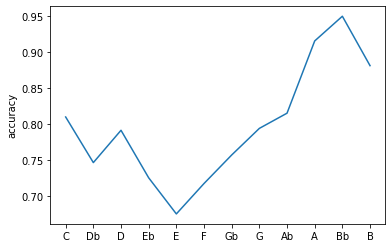

In [154]:
plt.plot(notes, accs)
# plt.xticks(notes)
plt.ylabel('accuracy')